<a href="https://colab.research.google.com/github/vvadimmm/Quant/blob/main/Autocall_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Le but de ce notebook est de pricer un autocall, avec un modèle simple de Black-Scholes à volatilité constante;
L'objectif est d'avoir une première idée de comment pricer cet instrument, puis de comparer l'impact de différents modèles sur le prix

In [ ]:
def simulate_paths(sigma,r,S0,T,nb_path,n):
  paths=np.ones((nb_path,n))*S0
  dt=T/n

  for i in range(1,n):
    Z=np.random.normal(0,1,nb_path)
    paths[:,i]=S0*np.exp((r-(1/2)*sigma**2)*dt+sigma*np.sqrt(dt)*Z)
    S0=paths[:,i]
  return(paths)





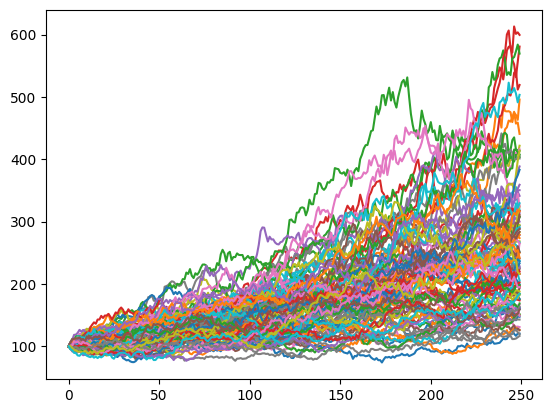

In [ ]:
path1=simulate_paths(0.3,0.02,100,2,100,250)

for i in (path1):
  plt.plot(range(len(i)),i)

In [ ]:
def autocall(num_sim, freq_check,low,high,c,sigma,r,S0,T,n):
  PVS=[]

  paths=simulate_paths(sigma,r,S0,T,num_sim,n)

  for i in range(T*freq_check-1):
    higher=paths[:,round((i+1)*n/(T*freq_check))]>high*S0
    payoff=(high*S0+S0*c*((i+1)/freq_check))
    PVS+=[payoff*np.exp(-r*((i+1)/freq_check))]*higher.sum()
    paths=np.delete(paths,higher,axis=0)

  payoff=(S0+S0*c*T)
  PVS+=[payoff*np.exp(-r*T)]*(paths[:,-1]>low*S0).sum()
  PVS+=list(np.exp(-r*T)*paths[:,-1][paths[:,-1]<=low*S0])

  return(PVS)




In [ ]:
np.mean(autocall(10000,4,0.6,1,0.05,0.2,0.02,100,2,500))

np.float64(100.76963637337019)